In [ ]:
#hide
from pyfly_fixed_wing_visualizer.pyfly_fixed_wing_visualizer import simrecorder

# pyfly_fixed_wing_visualizer

> Record and visualize pyfly-fixed-wing simulations

## Install

`pip install ...` <- TODO

## How to use

In [ ]:
from pyfly.pyfly import PyFly
from pyfly.pid_controller import PIDController
import numpy as np

sim = PyFly("/home/user/anaconda3/lib/python3.8/site-packages/pyfly/pyfly_config.json", "/home/user/anaconda3/lib/python3.8/site-packages/pyfly/x8_param.mat")
sim.seed(0)
sim.reset(state={"roll": -0.5, "pitch": 0.15, "Wind": 1})

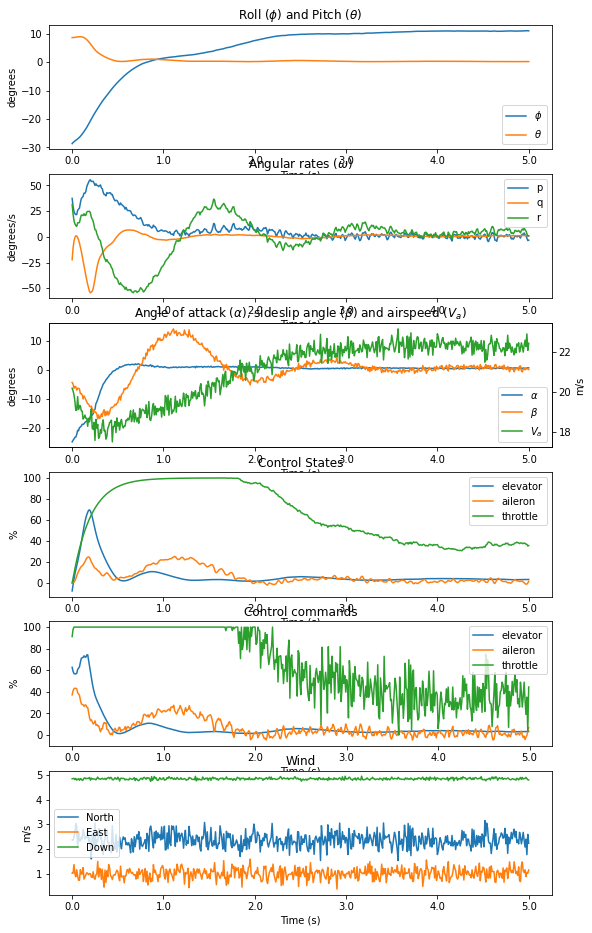

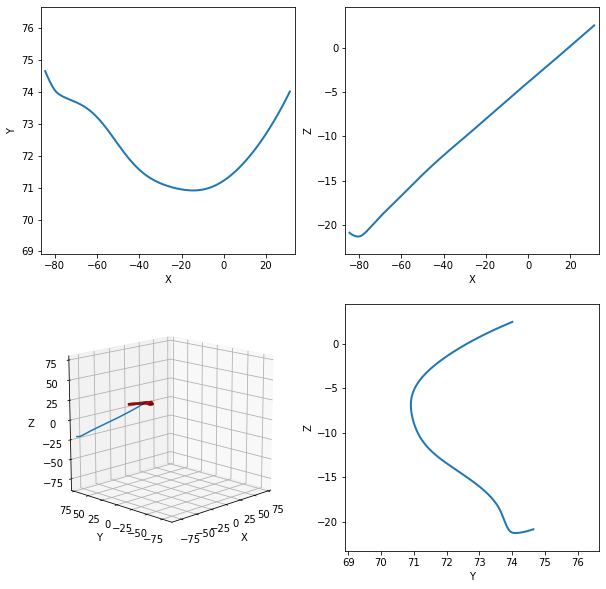

In [ ]:
sim.seed(0)

sim.reset(state={"roll": -0.5, "pitch": 0.15})
pid = PIDController(sim.dt)
pid.set_reference(phi=0.2, theta=0, va=22)


rec = simrecorder(500) #initialize with number of sim steps

for step_i in range(500):
    phi = sim.state["roll"].value
    theta = sim.state["pitch"].value
    Va = sim.state["Va"].value
    omega = [sim.state["omega_p"].value, sim.state["omega_q"].value, sim.state["omega_r"].value]

    action = pid.get_action(phi, theta, Va, omega)
    success, step_info = sim.step(action)

    if not success:
        break
    else:
        rec.savestate(sim.state, step_i) # record state at current step


sim.render(block=True)
rec.plot() #show me the video
